In [2]:
#try to get autocomplete working:

# !pip3 install jupyter-tabnine
# jupyter nbextension install --py jupyter_tabnine
# jupyter nbextension enable --py jupyter_tabnine
# jupyter serverextension enable --py jupyter_tabnine

#For autocomplete
# TabNine::sem

In [1]:
DATA_PATH = '../Data/'
US_Datapath=(DATA_PATH+'USvideos.csv')
US_Datapath


'../Data/USvideos.csv'

In [2]:
import pandas as pd
US=pd.read_csv(US_Datapath)

In [3]:
US.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [4]:
US.dtypes

video_id                  object
trending_date             object
title                     object
channel_title             object
category_id                int64
publish_time              object
tags                      object
views                      int64
likes                      int64
dislikes                   int64
comment_count              int64
thumbnail_link            object
comments_disabled           bool
ratings_disabled            bool
video_error_or_removed      bool
description               object
dtype: object

In [5]:
US.shape

(40949, 16)

Tasks:
- [ ] Change trending_date, and publish time to datetimes
- [ ] Split tags into multiple columns or only use one tag per observation ( the first one, which I hope is the "Best" descriptor)
- [ ] 

End Goal:
I want to be able to plug in any url, and be able to say something about the video.
Perhaphs projected views for the video ( this would requrie some more metrics about videos over time which isn't nativley available. I can however pull data over the course of n days before the video made it to trending, to see how changes in views influences "trending", or popularity of a video

target column:
"Rating" = (likes/(likes+dislikes))/number of views

ASSUMING RATING IS MY TARGET
If my target is rating I should drop like/dislikes but I can probably keep every other column 
I think I also might engineer a feature that shows impressions, and one that is impressions/ views.  I also need to figure out how exactly views are generated. What exactly constitutes a "view". 

My problem would be regression as rating would be a continuous

My evaluation metric would be mean absolute error on this generated metric.




I could also "generate a user profile" and guess if that user would like or dislike a new video, this would be more difficult however, because I would have to allow the user to supply their own data. 
Not sure if that sort of reccomender is feasable.


If my target is likes/dislikes/views then drop the one I'm using as the target, I'm not sure if there is going to be any more bleed.




In [5]:
import os
import google_auth_oauthlib.flow
import googleapiclient.discovery
import googleapiclient.errors

scopes = ['https://www.googleapis.com/auth/youtube.readonly']

#If you want to run this code through the terminal you have to write a main() function 
#if not I think you can just run the code in the cell

#This is ethe setup code:

#not sure what this line does, but
os.environ['OAUTHLIB_INSECURE_TRANSPORT'] = '1'

api_service_name = 'youtube'
api_version = 'v3'

#This is something I need if I'm going to be accessing my personal account
# I just want public data for this project so it shouldn't be necessary
# client_secrets_file = ''


#create an API client with credentials?


#Request:

youtube = googleapiclient.discovery.build(
    api_service_name,
    api_version,
    developerKey='YOUR_API_KEY_HERE'
    )

request = youtube.videos().list(
    part ='snippet,contentDetails,statistics',
    id='Ks-_Mh1QhMc'
)

response = request.execute()

print(response)

HttpError: <HttpError 400 when requesting https://www.googleapis.com/discovery/v1/apis/youtube/v3/rest?key=YOUR_API_KEY_HERE returned "Bad Request">

The result for the above when you put in a API key is: 

{'kind': 'youtube#videoListResponse', 'etag': '"j6xRRd8dTPVVptg711_CSPADRfg/k7CttWHb8uoG8jIt4tdyCkhQphE"', 'pageInfo': {'totalResults': 1, 'resultsPerPage': 1}, 'items': [{'kind': 'youtube#video', 'etag': '"j6xRRd8dTPVVptg711_CSPADRfg/HydqEC0sQljBF3YVHknMg3JQfyw"', 'id': 'Ks-_Mh1QhMc', 'snippet': {'publishedAt': '2012-10-01T15:27:35.000Z', 'channelId': 'UCAuUUnT6oDeKwE6v1NGQxug', 'title': 'Your body language may shape who you are | Amy Cuddy', 'description': 'Body language affects how others see us, but it may also change how we see ourselves. Social psychologist Amy Cuddy argues that "power posing" -- standing in a posture of confidence, even when we don\'t feel confident -- can boost feelings of confidence, and might have an impact on our chances for success. (Note: Some of the findings presented in this talk have been referenced in an ongoing debate among social scientists about robustness and reproducibility. Read Amy Cuddy\'s response here: http://ideas.ted.com/inside-the-debate-about-power-posing-a-q-a-with-amy-cuddy/)\n\nGet TED Talks recommended just for you! Learn more at https://www.ted.com/signup.\n\nThe TED Talks channel features the best talks and performances from the TED Conference, where the world\'s leading thinkers and doers give the talk of their lives in 18 minutes (or less). Look for talks on Technology, Entertainment and Design -- plus science, business, global issues, the arts and more.\n\nFollow TED on Twitter: http://www.twitter.com/TEDTalks\nLike TED on Facebook: https://www.facebook.com/TED\n\nSubscribe to our channel: https://www.youtube.com/TED', 'thumbnails': {'default': {'url': 'https://i.ytimg.com/vi/Ks-_Mh1QhMc/default.jpg', 'width': 120, 'height': 90}, 'medium': {'url': 'https://i.ytimg.com/vi/Ks-_Mh1QhMc/mqdefault.jpg', 'width': 320, 'height': 180}, 'high': {'url': 'https://i.ytimg.com/vi/Ks-_Mh1QhMc/hqdefault.jpg', 'width': 480, 'height': 360}, 'standard': {'url': 'https://i.ytimg.com/vi/Ks-_Mh1QhMc/sddefault.jpg', 'width': 640, 'height': 480}, 'maxres': {'url': 'https://i.ytimg.com/vi/Ks-_Mh1QhMc/maxresdefault.jpg', 'width': 1280, 'height': 720}}, 'channelTitle': 'TED', 'tags': ['Amy Cuddy', 'TED', 'TEDTalk', 'TEDTalks', 'TED Talk', 'TED Talks', 'TEDGlobal', 'brain', 'business', 'psychology', 'self', 'success'], 'categoryId': '22', 'liveBroadcastContent': 'none', 'defaultLanguage': 'en', 'localized': {'title': 'Your body language may shape who you are | Amy Cuddy', 'description': 'Body language affects how others see us, but it may also change how we see ourselves. Social psychologist Amy Cuddy argues that "power posing" -- standing in a posture of confidence, even when we don\'t feel confident -- can boost feelings of confidence, and might have an impact on our chances for success. (Note: Some of the findings presented in this talk have been referenced in an ongoing debate among social scientists about robustness and reproducibility. Read Amy Cuddy\'s response here: http://ideas.ted.com/inside-the-debate-about-power-posing-a-q-a-with-amy-cuddy/)\n\nGet TED Talks recommended just for you! Learn more at https://www.ted.com/signup.\n\nThe TED Talks channel features the best talks and performances from the TED Conference, where the world\'s leading thinkers and doers give the talk of their lives in 18 minutes (or less). Look for talks on Technology, Entertainment and Design -- plus science, business, global issues, the arts and more.\n\nFollow TED on Twitter: http://www.twitter.com/TEDTalks\nLike TED on Facebook: https://www.facebook.com/TED\n\nSubscribe to our channel: https://www.youtube.com/TED'}, 'defaultAudioLanguage': 'en'}, 'contentDetails': {'duration': 'PT21M3S', 'dimension': '2d', 'definition': 'hd', 'caption': 'true', 'licensedContent': True, 'projection': 'rectangular'}, 'statistics': {'viewCount': '17212155', 'likeCount': '239340', 'dislikeCount': '4785', 'favoriteCount': '0', 'commentCount': '7809'}}]}

Here is the code form a snippet provided by google:
https://developers.google.com/youtube/v3/docs/channels/list?apix=true

import os

import google_auth_oauthlib.flow
import googleapiclient.discovery
import googleapiclient.errors

scopes = ["https://www.googleapis.com/auth/youtube.readonly"]

def main():
    # Disable OAuthlib's HTTPS verification when running locally.
    # *DO NOT* leave this option enabled in production.
    os.environ["OAUTHLIB_INSECURE_TRANSPORT"] = "1"

    api_service_name = "youtube"
    api_version = "v3"
    client_secrets_file = "YOUR_CLIENT_SECRET_FILE.json"

    # Get credentials and create an API client
    flow = google_auth_oauthlib.flow.InstalledAppFlow.from_client_secrets_file(
        client_secrets_file, scopes)
    credentials = flow.run_console()
    youtube = googleapiclient.discovery.build(
        api_service_name, api_version, credentials=credentials)

    request = youtube.channels().list(
        part="snippet,contentDetails,statistics",
        id="UC_x5XG1OV2P6uZZ5FSM9Ttw"
    )
    response = request.execute()

    print(response)

if __name__ == "__main__":
    main()

## This is a proof of concept. I can get data from the youtube API now

I, however, have a limited number of calls, and I can't get too much data from youtube unless I request more information. I could, alternativley try a scraper to get some of the same information. 

For now the proof of concept is good. I learned something. I'm going to focus back on the current project. 

My target for this project is going to be views. I'll deal with the problems that arise from the nature of my target later. (specifically that views is ever changing, so what exactly am I trying to guess? The views currently on a video, or some sort of guess at what the views should be based on category?

In [6]:
US.category_id.value_counts()

24    9964
10    6472
26    4146
23    3457
22    3210
25    2487
28    2401
1     2345
17    2174
27    1656
15     920
20     817
19     402
2      384
29      57
43      57
Name: category_id, dtype: int64

The Categories can be seen here: https://gist.github.com/dgp/1b24bf2961521bd75d6c
It seems like you can view these categories when you upload to youtube, and choose the category for your video

This dataset, however, is a bit older, so it might not be perfectly accurate to use this system, Regardless the category column may be useful in finding some patterns.

The top categories (in order ) are :
Entertainment
Music
How-to & Style
Comedy
People and Blogs
News and Politics

This could be a target for my project. Figuring out category of something from auxillary information. This would also be more easily extendible, because nlp can be used on the desccription, as well as the comments to help identify category. And even further you can do some image processing on the thumbnail to help identify category. The problem is that it might be too easy for my dataset, and too hard to generalize. I mean that if you wanted to stick any youtube video into a form and output a category it would be hard because many youtube videos don't have a proper description, tags, or even comments. How would you figure out category in those cases? 

I think that the general question, the big question that I keep asking for this dataset is: How do I even get a well "balanced" dataset for youtube? How much variance do I need, and along which dimensions to truly get a set of videos that describe the "average" youtube experience. This is important because model flexibility is dependent on variance of data. So the selection process of the data itself is cruicial for a topic like this one. 

In [7]:
#for now I'm going to go with positive rating as a percent of total ratings as my target column
US['pos_rating'] = US.likes/(US.likes+US.dislikes)
US.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,pos_rating
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,0.950970
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",0.940521
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,0.964729
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,0.938550
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,0.985181


In [8]:
from sklearn.model_selection import train_test_split
train_size = .85
train,test = train_test_split(US,train_size = train_size)
val_size = .20
train,val= train_test_split(train,test_size = val_size)

train.shape,val.shape,test.shape

#Should val and test size be comparable?

((27844, 17), (6962, 17), (6143, 17))

In [9]:
A = train.drop(train[train.pos_rating.isna()==True].index)

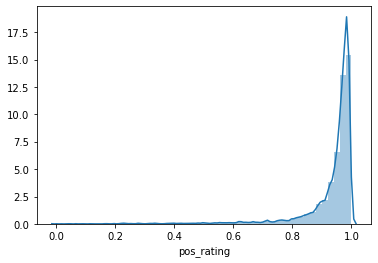

In [10]:
%matplotlib inline
import seaborn as sns
sns.distplot(A.pos_rating)

In [11]:
US.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,pos_rating
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,0.950970
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",0.940521
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,0.964729
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,0.938550
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,0.985181


In [12]:
def wrangle(X):
    X = X.copy()
    
    #Drop all the rows where the pos_rating would be nan
    X = X.drop(X[X.pos_rating.isna()==True].index)
    
    return X
print(train.shape)    

#Manual check if needed
# train[train.comments_disabled==False].shape


train = wrangle(train)
val = wrangle(val)

train.shape,test.shape

(27844, 17)


((27738, 17), (6143, 17))

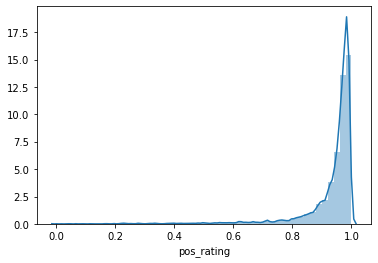

In [13]:
sns.distplot(train.pos_rating)

In [14]:
print(US.pos_rating.mean())
print(US.pos_rating.describe())

0.9331127245054371
count    40779.000000
mean         0.933113
std          0.102317
min          0.000000
25%          0.930331
50%          0.966988
75%          0.982790
max          1.000000
Name: pos_rating, dtype: float64


In [15]:
#For now lets just get the numerical variables and run it quickly through a model:
import numpy as np
target = 'pos_rating'
drop = ['likes','dislikes']
baseline_test = US.select_dtypes(include = np.number)

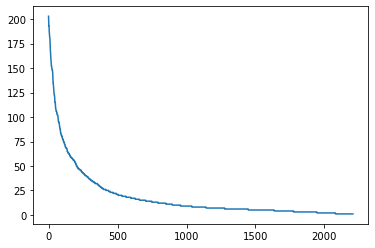

In [39]:
import matplotlib.pyplot as plt
a = US.channel_title.value_counts()
b = list(range(len(a)))

plt.plot(b,a)

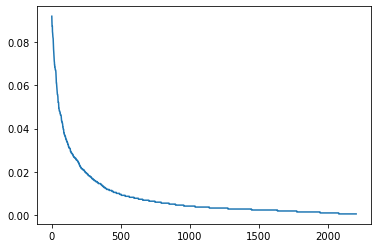

In [41]:
#lets normalize by the number in the dataframe

#The graph looks the exact same, but now I can sum up by percent instead
#of a meaningless value
c = a/len(a)

